# Import Library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

# Project Overview
**Goal:** Analyze e-commerce sales and profit performance over time and across categories/regions, and provide data-driven recommendations.

**Dataset:** `ecommerce_sales_data (2).csv` with columns:
- Order Date, Product Name, Category, Region, Quantity, Sales, Profit

**Margin metric used in this project:** `Profit Margin = Profit / Sales` (COGS is not available, so this is a proxy margin).


In [4]:
df = pd.read_csv("ecommerce_sales_data (2).csv")

# Data Profiling


In [5]:
df.head(5)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [7]:
df = df.convert_dtypes()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   string 
 1   Product Name  3500 non-null   string 
 2   Category      3500 non-null   string 
 3   Region        3500 non-null   string 
 4   Quantity      3500 non-null   Int64  
 5   Sales         3500 non-null   Int64  
 6   Profit        3500 non-null   Float64
dtypes: Float64(1), Int64(2), string(4)
memory usage: 201.8 KB


In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3500 non-null   datetime64[ns]
 1   Product Name  3500 non-null   string        
 2   Category      3500 non-null   string        
 3   Region        3500 non-null   string        
 4   Quantity      3500 non-null   Int64         
 5   Sales         3500 non-null   Int64         
 6   Profit        3500 non-null   Float64       
dtypes: Float64(1), Int64(2), datetime64[ns](1), string(3)
memory usage: 201.8 KB


# Adding Columns for Analysis

In [11]:
# Adding Profit Margin column
df["Profit Margin"] = np.where(df["Sales"] != 0, df["Profit"] / df["Sales"], np.nan)

# Adding Year/Month columns
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["YearMonth"] = df["Order Date"].dt.to_period("M")

In [12]:
df.head(5)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Profit Margin,Year,Month,YearMonth
0,2024-12-31,Printer,Office,North,4,3640,348.93,0.095860,2024,12,2024-12
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,0.088997,2022,11,2022-11
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,0.085717,2022,5,2022-05
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,0.258104,2024,3,2024-03
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,0.202908,2022,9,2022-09


# Basic descriptive statistics

In [13]:
df.describe()

,Order Date,Quantity,Sales,Profit,Profit Margin,Year,Month
count,3500,3500.0,3500.0,3500.0,3500.000000,3500.000000,3500.000000
mean,2023-07-13 00:53:53.828571648,4.931714,3047.966,527.047203,0.173699,2023.030857,6.512286
min,2022-01-01 00:00:00,1.0,51.0,6.97,0.050047,2022.000000,1.000000
25%,2022-10-16 18:00:00,3.0,1049.5,158.695,0.113699,2022.000000,4.000000
50%,2023-07-21 12:00:00,5.0,2350.5,361.07,0.172246,2023.000000,6.000000
75%,2024-04-16 06:00:00,7.0,4537.0,729.125,0.233432,2024.000000,10.000000
max,2024-12-31 00:00:00,9.0,10782.0,2946.93,0.299951,2024.000000,12.000000
std,NaN,2.575895,2440.213237,504.139732,0.071019,0.809466,3.447415


# Data Cleaning


In [14]:
# Checking Duplicate
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

#
if dup_count > 0:
    df = df.drop_duplicates().copy()
    print("After drop duplicates:", df.shape)

Duplicate rows: 0


In [15]:
# Basic sanity checks (data validity)
print("Quantity <= 0:", (df["Quantity"] <= 0).sum())
print("Sales < 0:", (df["Sales"] < 0).sum())
print("Sales == 0:", (df["Sales"] == 0).sum())
print("Profit < 0:", (df["Profit"] < 0).sum())


Quantity <= 0: 0
Sales < 0: 0
Sales == 0: 0
Profit < 0: 0


In [16]:
# Handling Outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
columns_to_clean = ["Quantity", "Sales", "Profit", "Profit Margin"]
df_cleaned = df.copy()

for column in columns_to_clean:
  df_cleaned = remove_outliers(df_cleaned, column)

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3295 entries, 0 to 3498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     3295 non-null   datetime64[ns]
 1   Product Name   3295 non-null   string        
 2   Category       3295 non-null   string        
 3   Region         3295 non-null   string        
 4   Quantity       3295 non-null   Int64         
 5   Sales          3295 non-null   Int64         
 6   Profit         3295 non-null   Float64       
 7   Profit Margin  3295 non-null   float64       
 8   Year           3295 non-null   int32         
 9   Month          3295 non-null   int32         
 10  YearMonth      3295 non-null   period[M]     
dtypes: Float64(1), Int64(2), datetime64[ns](1), float64(1), int32(2), period[M](1), string(3)
memory usage: 292.8 KB


In [19]:
# Cleaning log (for report/README)
rows_before = df.shape[0]
rows_after = df_cleaned.shape[0]
print("Rows before cleaning:", rows_before)
print("Rows after outlier removal:", rows_after)
print("Rows removed:", rows_before - rows_after, f"({(rows_before-rows_after)/rows_before*100:.2f}%)")


Rows before cleaning: 3500
Rows after outlier removal: 3295
Rows removed: 205 (5.86%)


In [20]:
# Correlations
correlations_columns = ["Quantity", "Sales", "Profit", "Profit Margin"]
correlations_matrix = df_cleaned[correlations_columns].corr()
correlations_matrix

,Quantity,Sales,Profit,Profit Margin
Quantity,1.000000,0.620726,0.518880,-0.068023
Sales,0.620726,1.000000,0.795385,-0.148451
Profit,0.518880,0.795385,1.000000,0.356022
Profit Margin,-0.068023,-0.148451,0.356022,1.000000


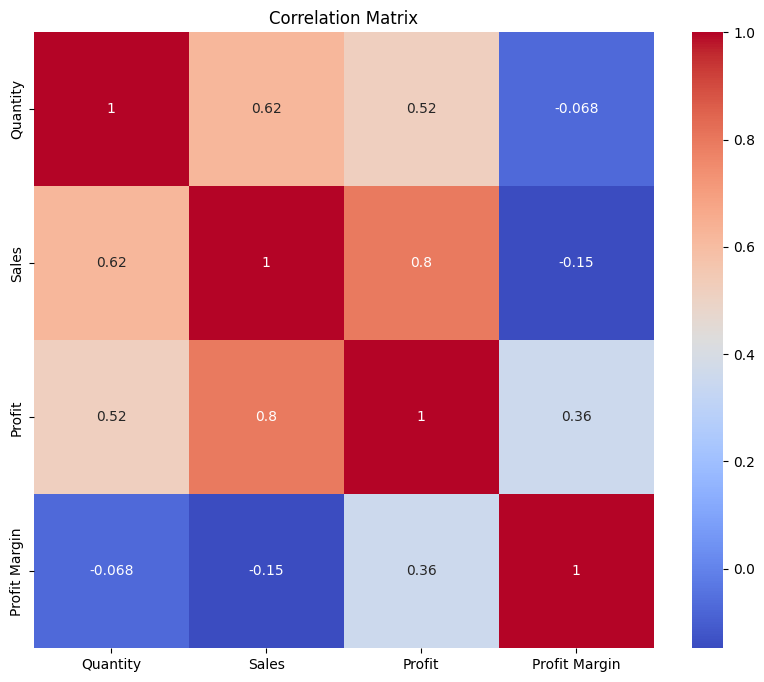

In [21]:
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Exploratory Data Analysis

In [22]:
# Monthly
monthly = df_cleaned.groupby("YearMonth").agg(
    orders=("Product Name", "count"),
    units=("Quantity", "sum"),
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

monthly["profit_margin"] = monthly["profit"] / monthly["sales"]
monthly.head(5)

,YearMonth,orders,units,sales,profit,profit_margin
0,2022-01,106,479,286634,49859.82,0.173949
1,2022-02,79,362,193594,30509.41,0.157595
2,2022-03,97,430,256643,42990.25,0.16751
3,2022-04,83,385,196982,35859.07,0.182042
4,2022-05,99,429,259418,41204.51,0.158834


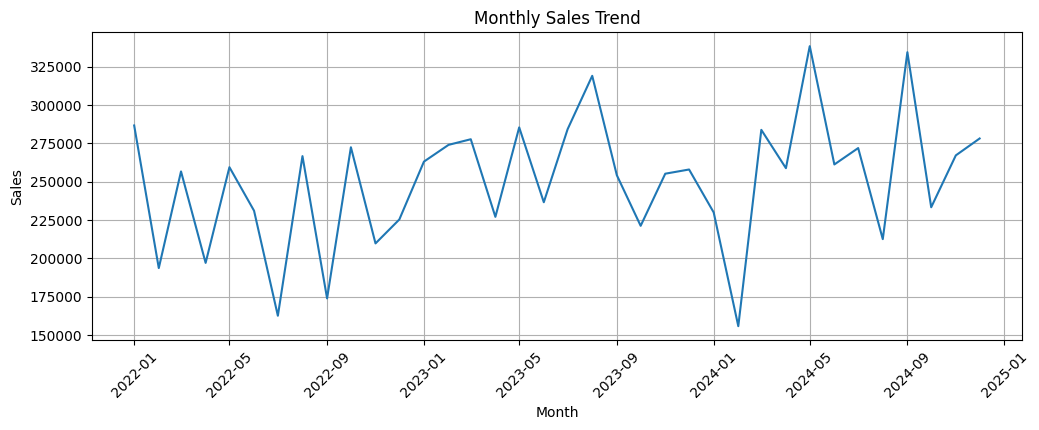

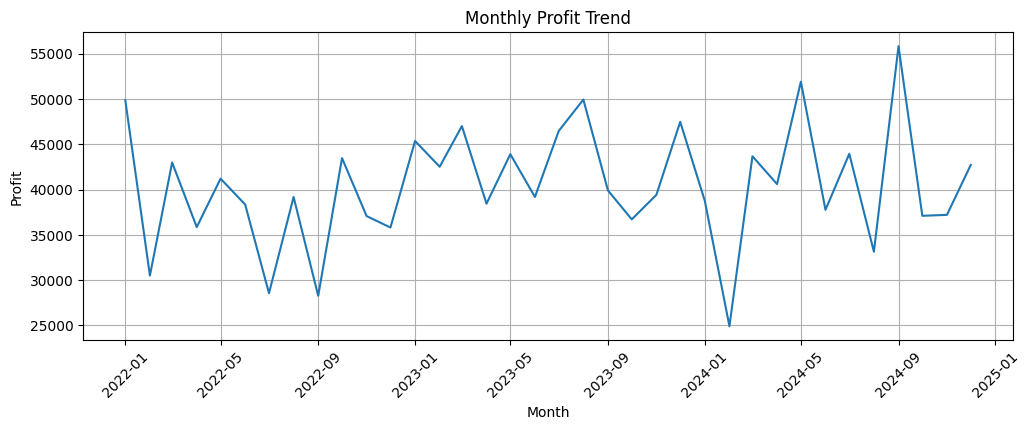

In [23]:
plt.figure(figsize=(12,4))
plt.plot(monthly["YearMonth"].dt.to_timestamp(), monthly["sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(monthly["YearMonth"].dt.to_timestamp(), monthly["profit"])
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
# Category
category = df_cleaned.groupby("Category").agg(
    orders=("Product Name", "count"),
    units=("Quantity", "sum"),
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

category["profit_margin"] = category["profit"] / category["sales"]
category.sort_values("sales", ascending=False)

,Category,orders,units,sales,profit,profit_margin
1,Electronics,1639,7770,4486113,723260.94,0.161222
0,Accessories,1317,6237,3579614,580400.68,0.162141
2,Office,339,1592,949209,151473.42,0.159579


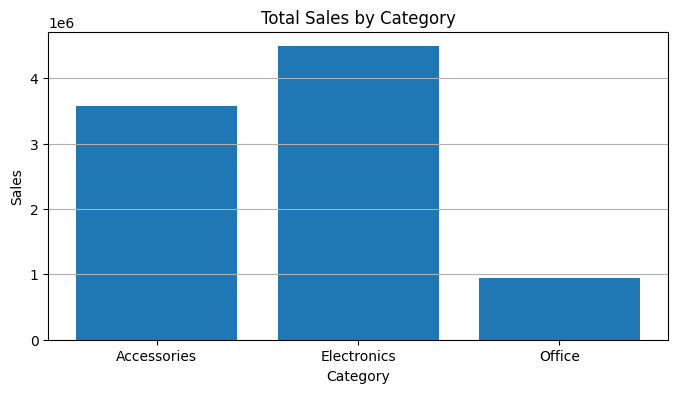

In [25]:
plt.figure(figsize=(8,4))
plt.bar(category["Category"], category["sales"])
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.grid(True, axis="y")
plt.show()

In [26]:
# Region
region = df_cleaned.groupby("Region").agg(
    orders=("Product Name", "count"),
    units=("Quantity", "sum"),
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

region["profit_margin"] = region["profit"] / region["sales"]
region.sort_values("sales", ascending=False)

,Region,orders,units,sales,profit,profit_margin
2,South,841,4020,2315613,375179.94,0.162022
3,West,830,3937,2290566,368599.07,0.160921
0,East,807,3869,2248444,363315.87,0.161585
1,North,817,3773,2160313,348040.16,0.161106


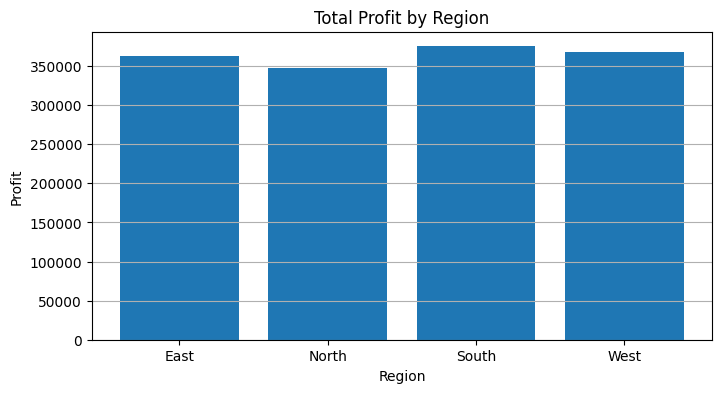

In [27]:
plt.figure(figsize=(8,4))
plt.bar(region["Region"], region["profit"])
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.grid(True, axis="y")
plt.show()

In [28]:
# High sales - Low Margin by category
cate = df_cleaned.groupby("Category").agg(
    orders=("Product Name", "count"),
    units=("Quantity", "sum"),
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

cate["profit_margin"] = cate["profit"] / cate["sales"]

# xếp hạng: sales cao (rank nhỏ) + margin thấp (rank nhỏ)
cate["sales_rank"] = cate["sales"].rank(ascending=False, method="min")
cate["low_margin_rank"] = cate["profit_margin"].rank(ascending=True, method="min")

cate["hs_lm_score"] = cate["sales_rank"] + cate["low_margin_rank"]
cate.sort_values("hs_lm_score").reset_index(drop=True)

,Category,orders,units,sales,profit,profit_margin,sales_rank,low_margin_rank,hs_lm_score
0,Electronics,1639,7770,4486113,723260.94,0.161222,1.0,2.0,3.0
1,Office,339,1592,949209,151473.42,0.159579,3.0,1.0,4.0
2,Accessories,1317,6237,3579614,580400.68,0.162141,2.0,3.0,5.0


In [29]:
# High sales - Low Margin by product
product = df_cleaned.groupby("Product Name").agg(
    orders=("Product Name", "count"),
    units=("Quantity", "sum"),
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

product["profit_margin"] = product["profit"] / product["sales"]

# Lấy top N sản phẩm theo sales, rồi sắp theo margin tăng dần
N = 10
top_sales = product.sort_values("sales", ascending=False).head(N)

high_sales_low_margin_products = top_sales.sort_values("profit_margin", ascending=True)
high_sales_low_margin_products

,Product Name,orders,units,sales,profit,profit_margin
7,Smartphone,305,1413,867416,134896.18,0.155515
9,Tablet,340,1649,937425,146671.17,0.156462
6,Printer,339,1592,949209,151473.42,0.159579
4,Monitor,339,1672,959461,153266.58,0.159742
5,Mouse,327,1594,919794,147371.63,0.160222
8,Smartwatch,342,1644,888769,142987.19,0.160882
2,Keyboard,332,1527,866898,141202.66,0.162883
0,Camera,342,1623,1000467,165916.65,0.165839
1,Headphones,319,1444,833461,138559.81,0.166246
3,Laptop,310,1441,792036,132789.75,0.167656


In [30]:
#
target_products = ["Smartphone", "Tablet"]

whatif = df_cleaned[df_cleaned["Product Name"].isin(target_products)].groupby("Product Name").agg(
    sales=("Sales", "sum"),
    profit=("Profit", "sum")
).reset_index()

whatif["profit_margin"] = whatif["profit"] / whatif["sales"]
whatif["extra_profit_if_margin_plus_1pct"] = whatif["sales"] * 0.01
whatif

,Product Name,sales,profit,profit_margin,extra_profit_if_margin_plus_1pct
0,Smartphone,867416,134896.18,0.155515,8674.16
1,Tablet,937425,146671.17,0.156462,9374.25


# Key Findings & Recommendations (Summary)

## Findings
- Sales and Profit are strongly correlated, while Profit Margin does not necessarily increase with Sales.
- Monthly performance shows clear variation (peak vs. low months), suggesting time-based effects (seasonality/campaigns).
- High Sales–Low Margin focus:
  - Category-level: prioritize optimizing the largest revenue category first (impact-based).
  - Product-level: within top-selling products, identify those with the lowest margins for targeted improvements.

## Recommendations
- Prioritize margin improvements for **top-selling, low-margin products** (e.g., Smartphone/Tablet) because small margin gains can yield meaningful profit increases.
- Monitor **Profit Margin** alongside Sales when planning growth (avoid “high sales, low margin” months).
- Plan inventory and operational readiness around peak months; optimize strategies during low months.

## Limitations
- The dataset does not include COGS/discount/promotion, so the margin metric used is `Profit / Sales` (proxy).
